[*********************100%%**********************]  1 of 1 completed


                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2004-05-17  0.476786  0.483214  0.470714  0.475714   0.402194  300445600
2004-05-18  0.481607  0.487321  0.478571  0.483214   0.408535  206063200
2004-05-19  0.489286  0.491071  0.471786  0.472679   0.399628  375592000
2004-05-20  0.475536  0.482143  0.472679  0.476964   0.403251  196296800
2004-05-21  0.480357  0.485714  0.477321  0.484107   0.409290  179894400
2004-05-24  0.487321  0.498214  0.484107  0.488214   0.412762  235603200
2004-05-25  0.491071  0.509107  0.487321  0.507321   0.428916  319978400
2004-05-26  0.505893  0.513929  0.500000  0.509107   0.430426  322168000
2004-05-27  0.508214  0.510714  0.496786  0.503036   0.425293  235972800
2004-05-28  0.501429  0.504821  0.496429  0.501071   0.423632  145717600


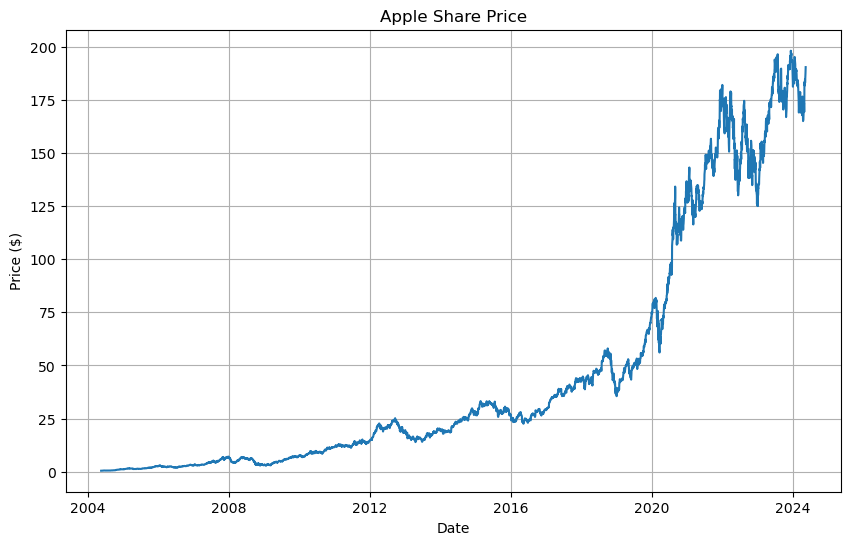

/home/kanna/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/kanna/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/kanna/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/kanna/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  r

Forecasted Prices:
5035    190.093988
5036    190.495772
5037    190.032452
5038    190.421970
5039    190.182955
5040    190.424632
5041    190.268564
5042    190.427693
5043    190.438880
5044    190.401973
5045    190.446081
5046    190.354352
5047    190.428618
5048    190.368344
5049    190.419096
5050    190.386208
5051    190.403398
5052    190.398746
5053    190.396116
5054    190.405799
5055    190.391224
5056    190.404573
5057    190.392453
5058    190.402499
5059    190.395949
5060    190.399679
5061    190.398223
5062    190.397755
5063    190.399524
5064    190.397163
5065    190.399626
5066    190.397297
5067    190.399192
5068    190.397871
5069    190.398680
5070    190.398339
5071    190.398300
5072    190.398581
5073    190.398168
5074    190.398628
5075    190.398194
5076    190.398552
5077    190.398288
5078    190.398456
5079    190.398379
5080    190.398384
5081    190.398428
5082    190.398355
5083    190.398439
5084    190.398358
Name: predicted_mean, dtype: fl

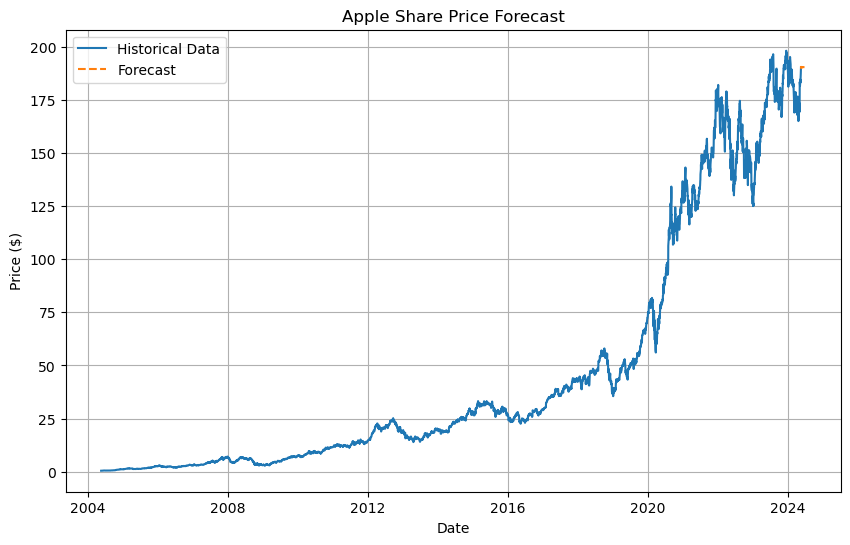

In [20]:
import yfinance as yf
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

# Download Apple share price data
apple_data = yf.download('AAPL', start=start, end=end)
print(apple_data.head(10))

# Selecting only the 'Close' prices
apple_close = apple_data['Close']

# Plotting the historical data
plt.figure(figsize=(10, 6))
plt.plot(apple_close)
plt.title('Apple Share Price')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()

# Fitting an ARIMA model
model = ARIMA(apple_close, order=(12,1,0))  # ARIMA(2,1,0) model as an example
fitted_model = model.fit()

# Forecasting future values
future_steps = 50  # Change this value according to your requirement
forecast = fitted_model.forecast(steps=future_steps)

# Printing the forecasted values
print("Forecasted Prices:")
print(forecast)

# Plotting the forecast
plt.figure(figsize=(10, 6))
plt.plot(apple_close, label='Historical Data')
plt.plot(pd.date_range(start=apple_close.index[-1], periods=future_steps, freq='D'), forecast, label='Forecast', linestyle='--')
plt.title('Apple Share Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()



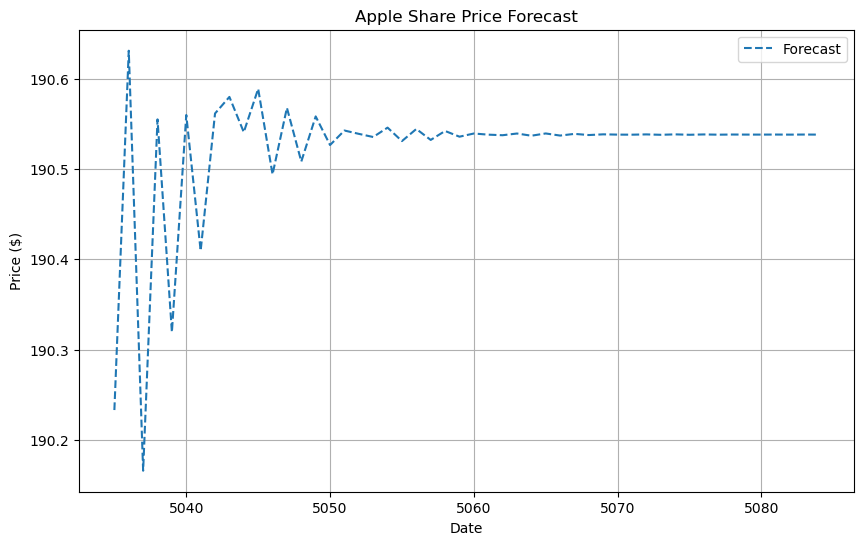

In [21]:

# Plotting the forecast
plt.figure(figsize=(10, 6))
plt.plot(forecast, label='Forecast', linestyle='--')
plt.title('Apple Share Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

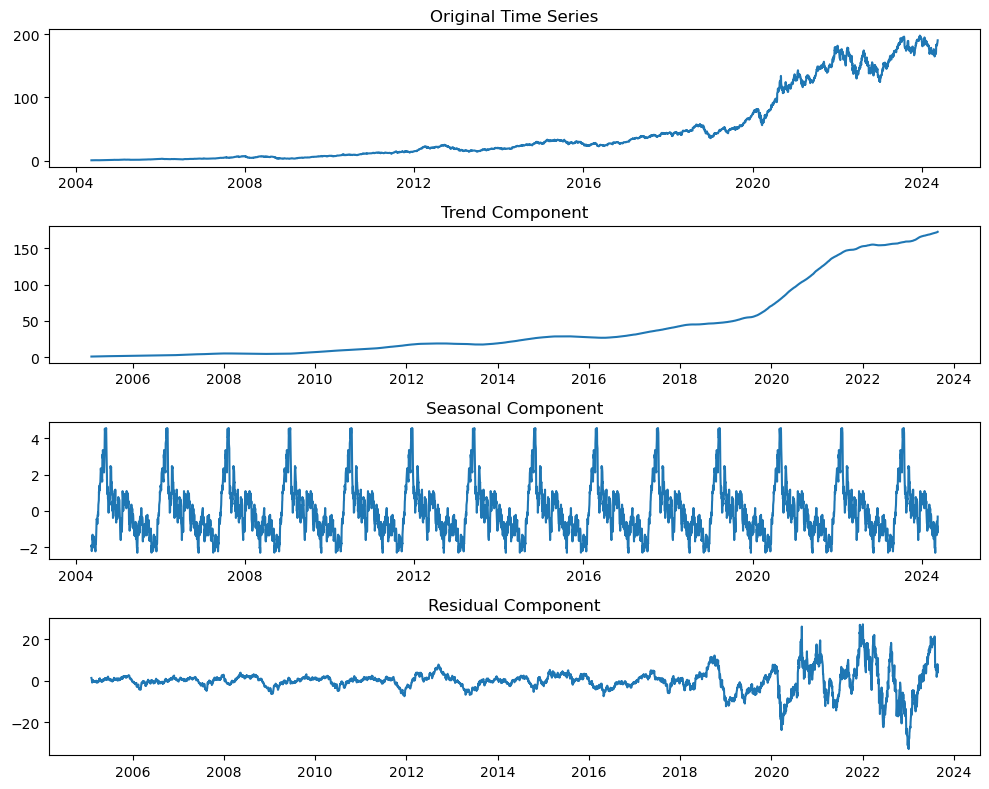

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposing the time series
result = seasonal_decompose(apple_close, model='additive',period = 365)

# Plotting the decomposition
plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
plt.plot(apple_close)
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(result.trend)
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal)
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(result.resid)
plt.title('Residual Component')

plt.tight_layout()
plt.show()

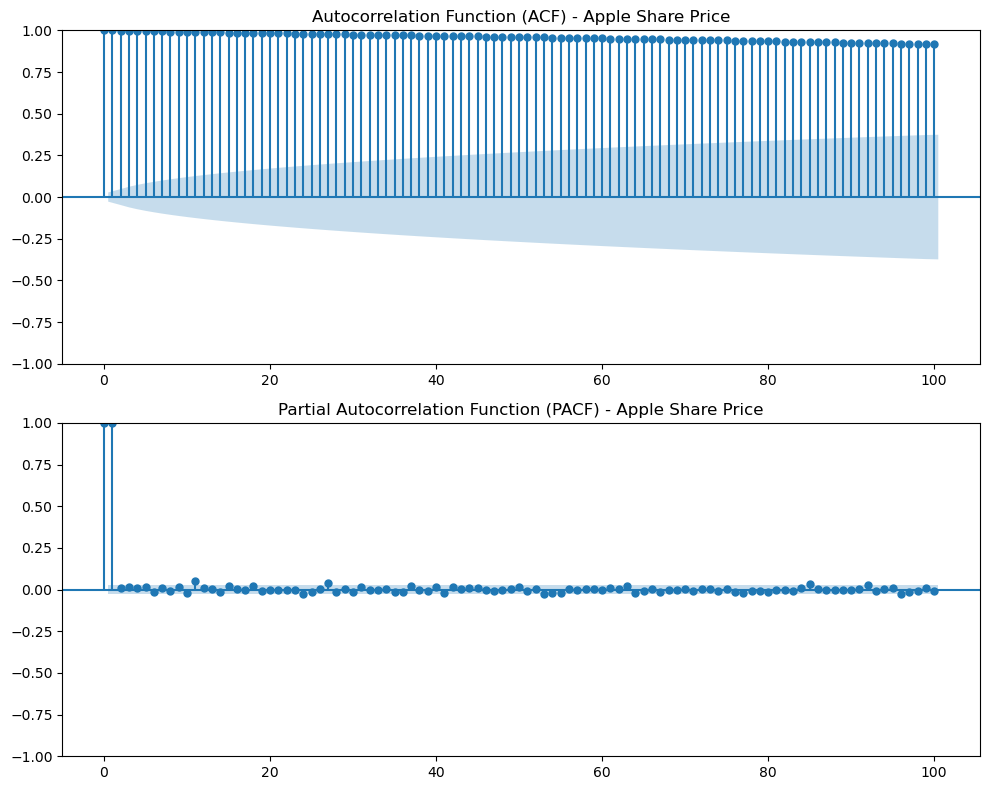

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Create subplots for ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot ACF
plot_acf(apple_close, lags=100, ax=ax1)
ax1.set_title('Autocorrelation Function (ACF) - Apple Share Price')

# Plot PACF
plot_pacf(apple_close, lags=100, ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF) - Apple Share Price')

plt.tight_layout()
plt.show()